In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/penguins_lter.csv')
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
data.shape

(344, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

This dataset consists of 344 observations, each described by 17 features. The meaning of most features can be obtained from their names, however some of them requiere additional description. The 'Species' column represents the target variable. The 'Comments' column has only 26 non-null values out of 344, which is roughly 8%, so it will not provide any useful information.

In [5]:
columns_to_remove = ['Comments']

In [6]:
data.nunique()

studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64

Since each of 'Region' and 'Stage' columns contains only 1 unique value, they also do not provide useful information.

In [7]:
columns_to_remove.extend(['Region', 'Stage'])

And finally, each observation can be uniquely described by a combination of 'Sample Number' and 'Individual ID' variables, so we will also get rid of them.

In [8]:
columns_to_remove.extend(['Sample Number', 'Individual ID'])

In [9]:
columns_to_remove

['Comments', 'Region', 'Stage', 'Sample Number', 'Individual ID']

In [10]:
data.drop(columns = columns_to_remove, inplace = True)
data.head()

,studyName,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


In [11]:
data.isna().sum()

studyName               0
Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Before interpolating NaN values, columns with numeric data type have to be checked for outliers, as they can affect while calculating measures of central tendency.

In [12]:
num_col_with_nans = [column for column in data.columns if (data[column].dtype == np.float64) & (data[column].isna().any())]
num_col_with_nans

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

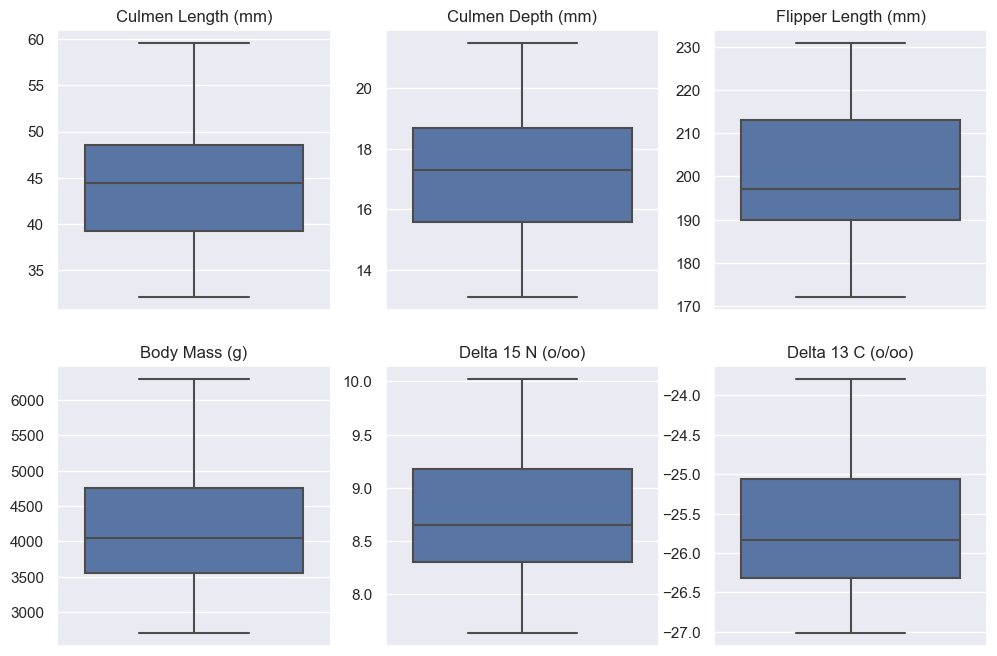

In [13]:
rows = 2
columns = 3
k=0
fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
for i in range(rows):
    for j in range(columns):
        sns.boxplot(ax = axes[i, j], data = data[num_col_with_nans[k]])
        axes[i, j].set_xticks([])
        axes[i, j].set_title(num_col_with_nans[k])
        k+=1

There are no outliers in any column above, therefore we can use mean values to fill NaNs. For the 'Sex' column we will use mode since it is categorical variable.

In [14]:
data['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

Although the gender distribution is fairly even, there appears to be an error in the data set. One observation is marked with '.' instead of 'Male' or 'Female'. We will change its value to NaN.

In [15]:
data['Sex'].replace('.', np.NaN, inplace = True)

In [16]:
data['Sex'].fillna(value = data['Sex'].mode()[0], inplace = True)

for column in num_col_with_nans:
    data[column].fillna(value = data[column].mean(), inplace = True)

In [17]:
data.isna().sum()

studyName              0
Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [18]:
data['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
  Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
  Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')])

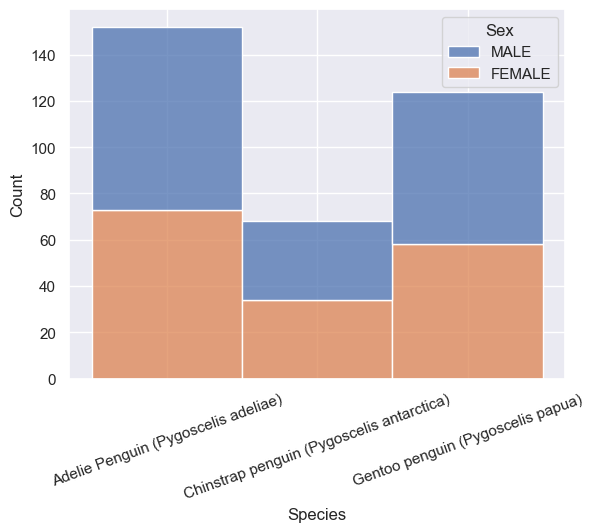

In [19]:
sns.histplot(data=data, x='Species', hue='Sex', multiple='stack')
plt.xticks(rotation=20)

There is a slight class imbalance as the ratio between classes 'Chinstrap penguin' and 'Adelie penguin' is approximately 4/9. The ratio of males to females in each class is approximately 1/1.

<AxesSubplot: xlabel='studyName', ylabel='Count'>

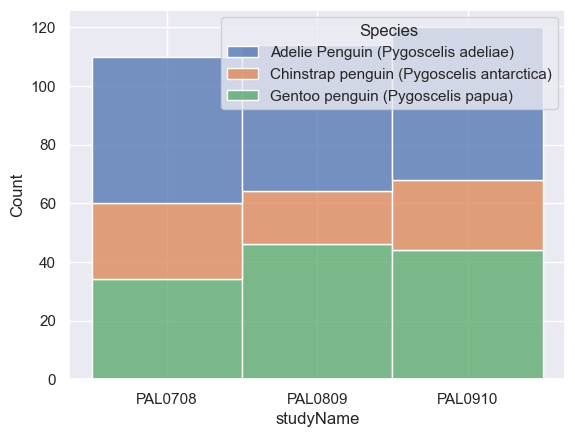

In [20]:
sns.histplot(data=data, x='studyName', hue='Species', multiple='stack')

The distribution of penguin species in all three studies is almost identical.

<AxesSubplot: xlabel='Island', ylabel='Count'>

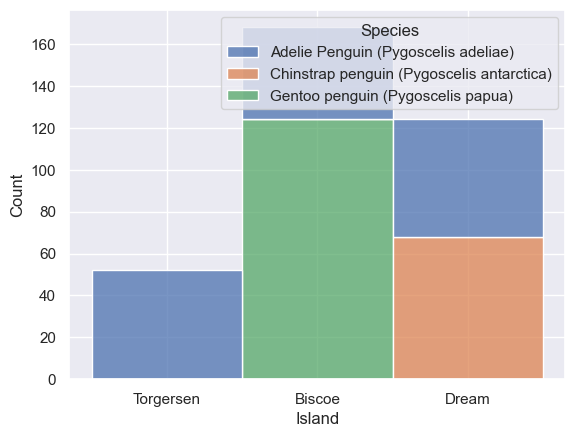

In [21]:
sns.histplot(data=data, x='Island', hue='Species', multiple='stack')

'Adelie Penguin' is the only penguin species found on all three islands. They are evenly distributed over them. Chinstrap penguins can be found only on Dream island, while Gentoo penguins inhabit only Biscoe island.

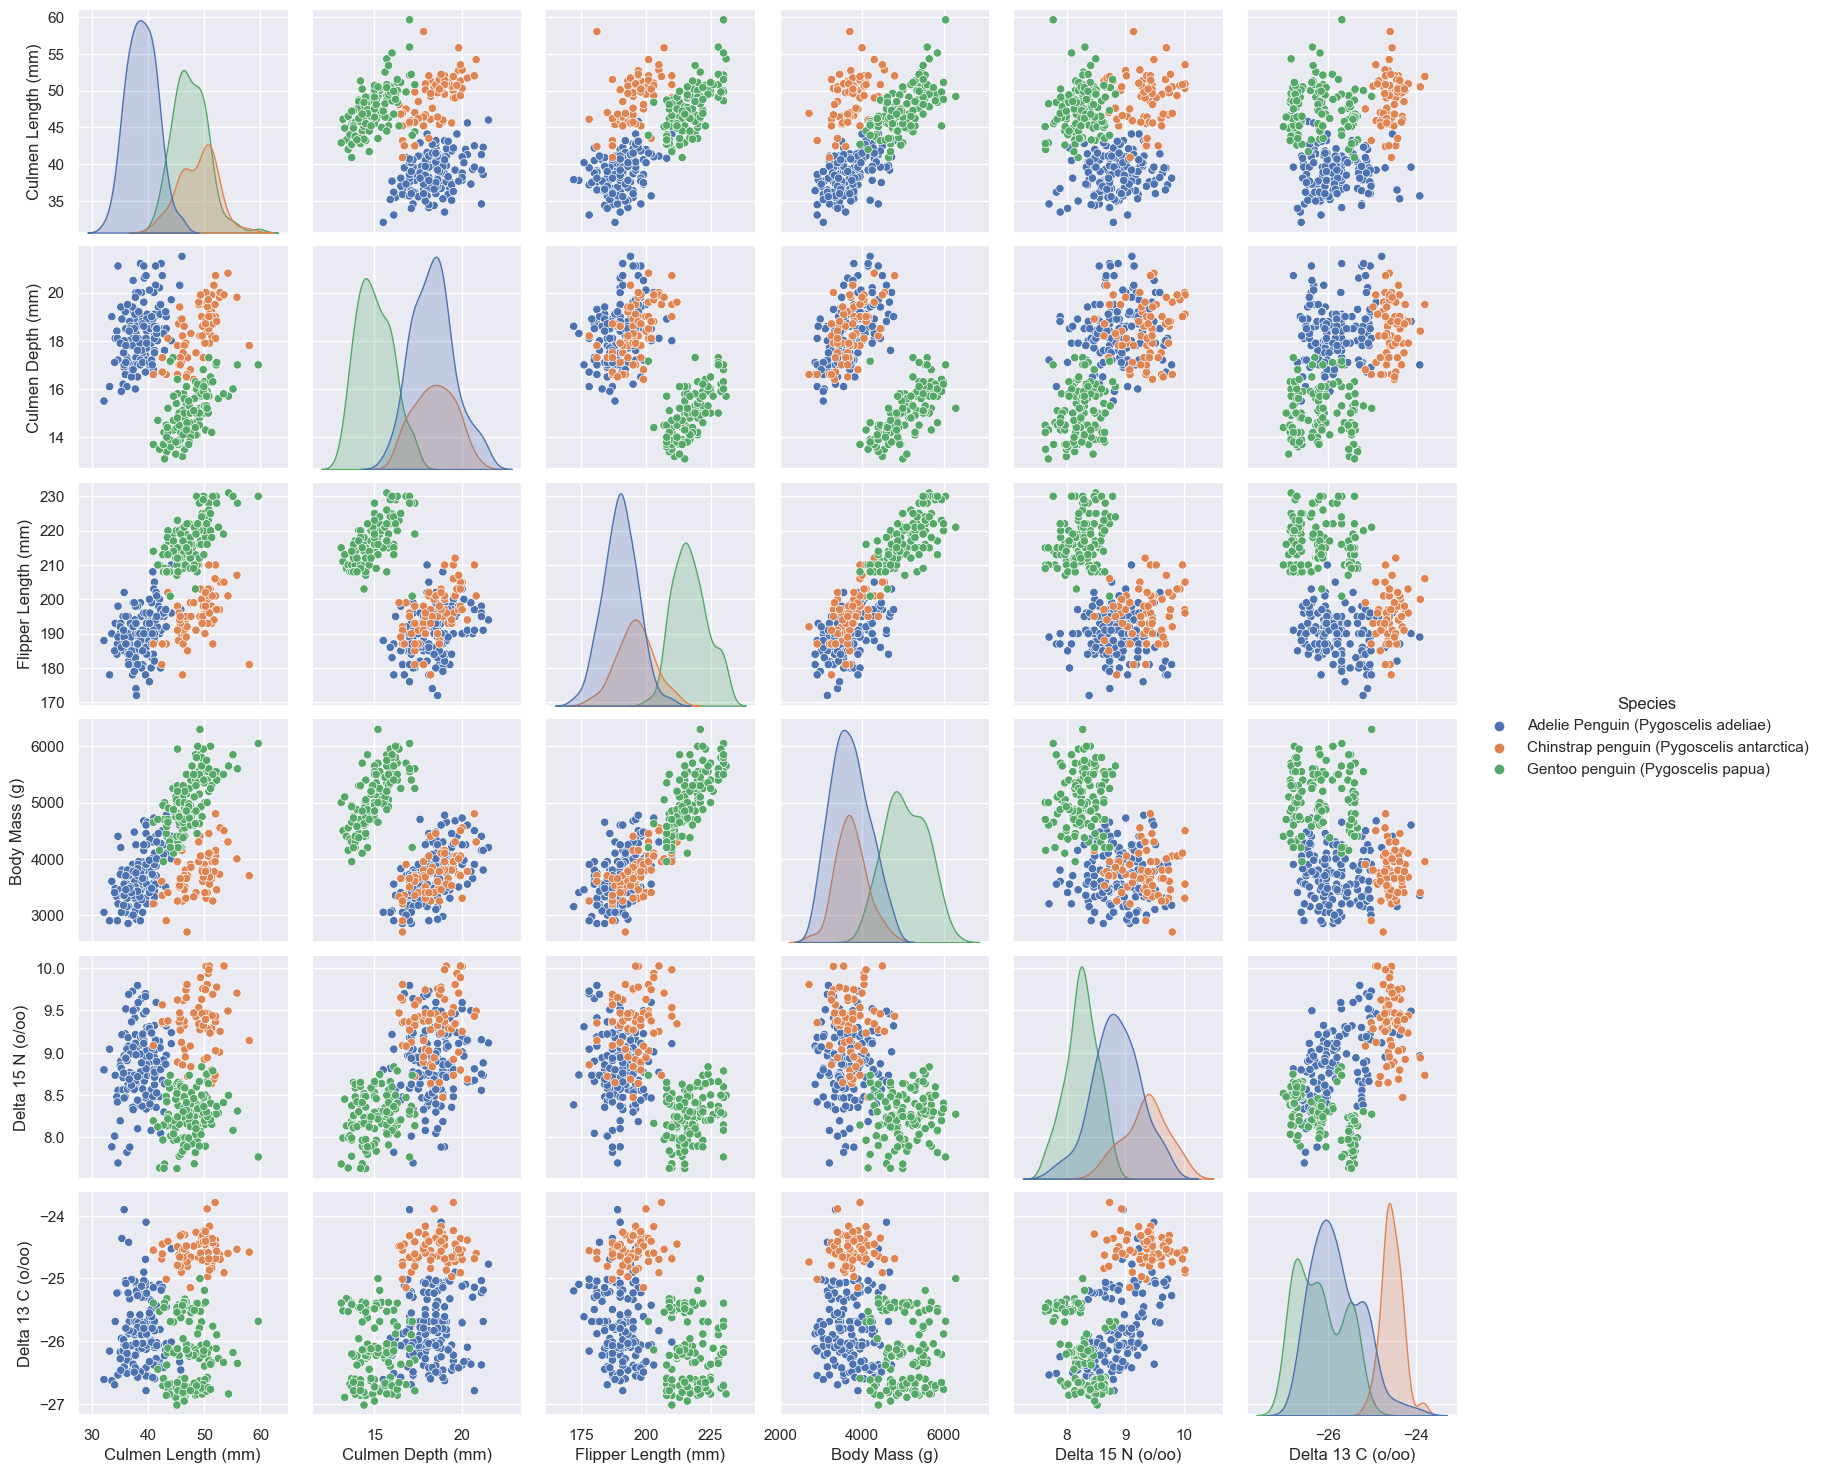

In [22]:
sns.pairplot(data = data,
             hue='Species')

As can be seen from the chart above, 'Culmen Length (mm)' and 'Delta 13 C (o/oo)' are the most descriptive features among numeric features because they allow us to clearly distinguish penguins no matter which other numeric features we combine them with.

<AxesSubplot: >

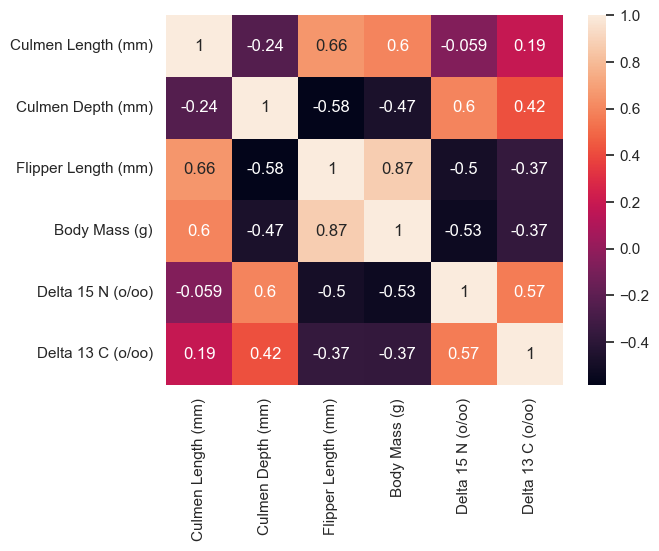

In [23]:
sns.heatmap(data.corr(), annot=True)

Since there is strong positive correlation (0.87) between 'Flipper Lenght (mm)' and 'Body Mass (g)' features, applying dimensionality reduction methods should be considered if using ML algorithms on this data.